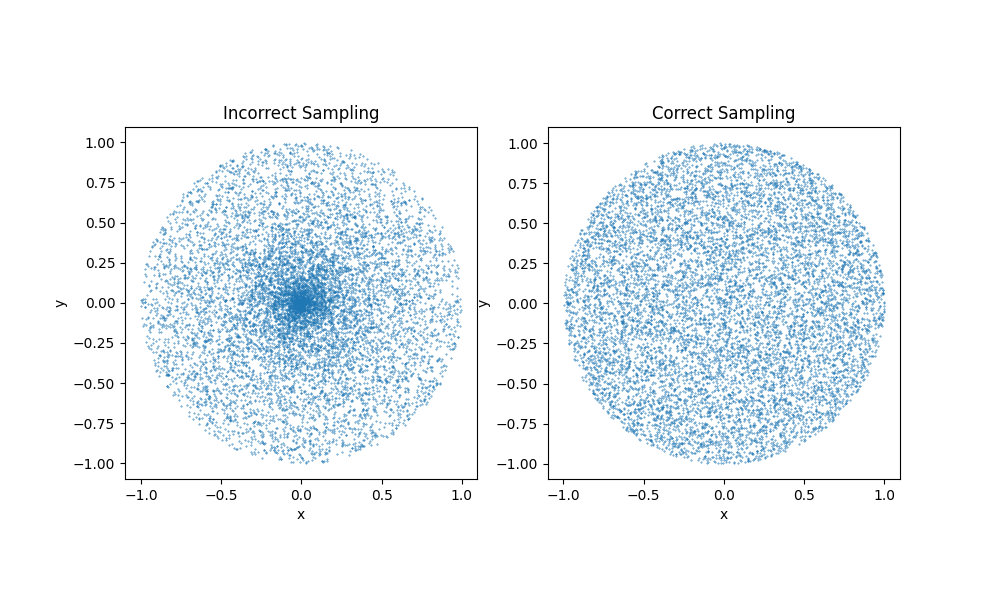

In [1]:
"""surface_sampling_circle.ipynb"""
# Cell 1

# This code corrects the problem where the distribution of random points fails to 
# maintain uniform density throughout the inside of the circle. 

# Code is modified from that given by Dr. David Biersach. 

# Code aided by the following online resources: 
# http://graphics.cs.cmu.edu/courses/15-468/lectures/lecture_08.pdf 
# https://www.youtube.com/watch?v=nTKGPCYkG70

# Allows for type hinting
from __future__ import annotations
# Allows for type hinting
import typing
# Used for plotting
import matplotlib.pyplot as plt
# Used for calculations 
import numpy as np
# Generates pseudo random numbers
import numpy.random as random
# Used for tick marks 
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    # Allows type checking for axes and arrays 
    from matplotlib.axes import Axes
    from numpy.typing import NDArray
# Menu bar on the side of the plot 
%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    """Generate random points known to be inside a unit circle centered at the origin"""
    num_samples = 10000
    # Pick a random radian angle (0≤𝜃<2𝜋) 
    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    # Pick a random radius(0≤𝑟<1) 
    r: NDArray[np.float_] = random.rand(num_samples)
    # Convert to polar coordinates 
    x: NDArray[np.float_] = r * np.cos(v)
    y: NDArray[np.float_] = r * np.sin(v)
    # Do a scatter plot of dots that are pixel sized 
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def plot_correct(ax: Axes) -> None:
    """Generate non-uniform samples for theta and r, uniform samples for x,y"""
    num_samples = 10000
    # Pick a random radian angle (0≤𝜃<2𝜋) 
    v: NDArray[np.float_] = np.linspace(0, 2*np.pi, num_samples)  # toroidal angle
    # Pick a random radius(0≤𝑟<1)
    r: NDArray[np.float_] = random.rand(num_samples)

    # TODO: Fix these next two lines

    # The samples should be non-uniform for theta and r, but uniform for x,y 
    # To fix this issue, we can take the square root of r, thereby choosing it non-uniformly. 
    x: NDArray[np.float_] = np.sqrt(r) * np.cos(v)
    y: NDArray[np.float_] = np.sqrt(r) * np.sin(v)
    
    # Do a scatter plot of dots that are pixel sized 
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def main() -> None:
    """Define an entry point for the function"""
    # Show the plots for both the correct and incorrect methods 
    plt.figure(" ", figsize=(10, 6))
    plot_incorrect(plt.subplot(121))
    plot_correct(plt.subplot(122))
    plt.show()

# Call the main function 
main()